In [1]:
import pandas as pd
import numpy as np
import random as rnd

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in data
print("Reading in data")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

combined_data = [train_df, test_df]

Reading in data


Generating graphs for each feature


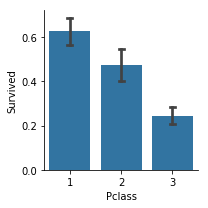

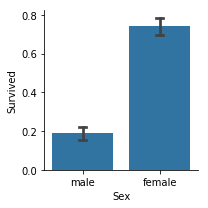

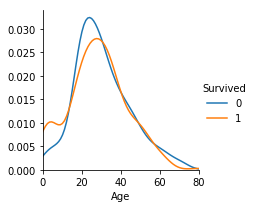

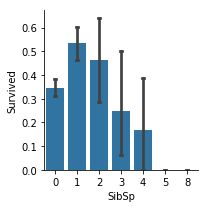

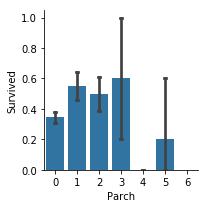

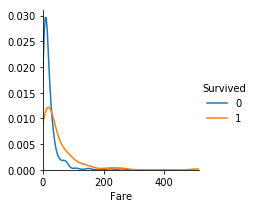

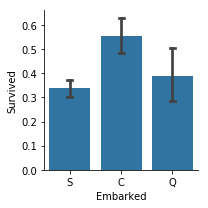

In [3]:
# Analyse data by generating graphs for each feature
print ("Generating graphs for each feature")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

class_graph = sns.FacetGrid(train_df, aspect=1)
class_graph.map(sns.barplot, "Pclass", "Survived", capsize=.1)
plt.show()

sex_graph = sns.FacetGrid(train_df, aspect=1)
sex_graph.map(sns.barplot, "Sex", "Survived", capsize=.1)
plt.show()

age_graph = sns.FacetGrid(train_df, hue="Survived", aspect=1)
age_graph.map(sns.kdeplot, "Age")
age_graph.set( xlim=( 0 , train_df[ "Age" ].max() ) )
age_graph.add_legend()
plt.show()

sibsp_graph = sns.FacetGrid(train_df, aspect=1)
sibsp_graph.map(sns.barplot, "SibSp", "Survived", capsize=.1)
plt.show()

parch_graph = sns.FacetGrid(train_df, aspect=1)
parch_graph.map(sns.barplot, "Parch", "Survived", capsize=.1)
plt.show()

fare_graph = sns.FacetGrid(train_df, hue="Survived", aspect=1)
fare_graph.map(sns.kdeplot, "Fare")
fare_graph.set( xlim=( 0 , train_df[ "Fare" ].max() ) )
fare_graph.add_legend()
plt.show()

embarked_graph = sns.FacetGrid(train_df, aspect=1)
embarked_graph.map(sns.barplot, "Embarked", "Survived", capsize=.1)
plt.show()

Generating 'Title' feature


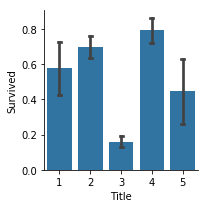

In [4]:
# Handle title mapping
print("Generating 'Title' feature")

title_mapping = {"Master": 1, "Miss": 2, "Mr": 3, "Mrs": 4, "Special": 5}

for df in combined_data:
    df["Title"] = df.Name.str.extract("([A-Za-z]+)\.", expand=False)

for df in combined_data:
    df["Title"] = df["Title"].replace([
        "Capt", "Col", "Countess", "Don", "Dr", "Jonkheer", "Lady", "Major", "Mlle", "Mme", "Ms", "Rev", "Sir"
    ], "Special")
    
for df in combined_data:
    df["Title"] = df["Title"].map(title_mapping)
    df["Title"] = df["Title"].fillna(0)
    
title_graph = sns.FacetGrid(train_df, aspect=1)
title_graph.map(sns.barplot, "Title", "Survived", capsize=.1)
plt.show()

In [5]:
# Guess missing ports
print("Guessing missing ports")

for df in combined_data:
    df["Embarked"] = df["Embarked"].fillna(train_df.Embarked.dropna().mode()[0])

Guessing missing ports


In [6]:
# Guess missing fares
print("Guessing missing fares")

for df in combined_data:
    df["Fare"] = df["Fare"].fillna(train_df.Fare.dropna().mean())

Guessing missing fares


In [7]:
# Convert sex and port to int
print("Converting columns to ints")

for df in combined_data:
    df["Sex"] = df["Sex"].map( {"female": 0, "male": 1} ).astype(int)
    df["Embarked"] = df["Embarked"].map( { "C": 0, "Q": 1, "S": 2 } ).astype(int)

Converting columns to ints


In [8]:
# Guess missing ages
print("Guessing missing ages")

predicted_ages = np.zeros((2,3))

for df in combined_data:
    for i in range(0, 2):
        for j in range (0, 3):
            guess_df = df[(df["Sex"] == i) & (df["Pclass"] == j+1)]["Age"].dropna()
            
            age_guess = guess_df.mean()
            
            predicted_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range (0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1), "Age"] = predicted_ages[i,j]
            
    df["Age"] = df["Age"].astype(int)

Guessing missing ages


Categorising ages


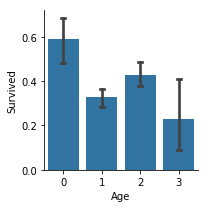

In [9]:
# Categorise ages
print("Categorising ages")

for df in combined_data:    
    df.loc[ df["Age"] <= 15, "Age"] = 0
    df.loc[(df["Age"] > 15) & (df["Age"] <= 30), "Age"] = 1
    df.loc[(df["Age"] > 30) & (df["Age"] <= 60), "Age"] = 2
    df.loc[ df["Age"] > 60, "Age"] = 3

age_graph = sns.FacetGrid(train_df, aspect=1)
age_graph.map(sns.barplot, "Age", "Survived", capsize=.1)
plt.show()

Categorising fares


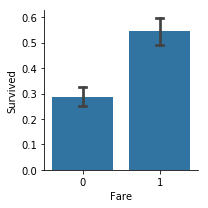

In [10]:
# Categorise fares
print("Categorising fares")

for df in combined_data:
    df.loc[ df["Fare"] <= 25, "Fare"] = 0
    df.loc[ df["Fare"] > 25, "Fare"] = 1
    df["Fare"] = df["Fare"].astype(int)
    
fare_graph = sns.FacetGrid(train_df, aspect=1)
fare_graph.map(sns.barplot, "Fare", "Survived", capsize=.1)
plt.show()

Generating 'WithFamily' feature


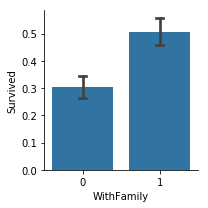

In [11]:
# Generate family category
print("Generating 'WithFamily' feature")

for df in combined_data:
    df["WithFamily"] = 0
    df.loc[df["Parch"] > 0, "WithFamily"] = 1
    df.loc[df["SibSp"] > 0, "WithFamily"] = 1
    
family_graph = sns.FacetGrid(train_df, aspect=1)
family_graph.map(sns.barplot, "WithFamily", "Survived", capsize=.1)
plt.show()

In [12]:
# Drop useless columns
print("Dropping useless columns")

train_df = train_df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Parch", "SibSp"], axis=1)
test_df = test_df.drop(["Name", "Ticket", "Cabin", "Parch", "SibSp"], axis=1)

combined_data = [train_df, test_df]

Dropping useless columns


In [13]:
# Create training data
print("Creating training data objects")

X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

Creating training data objects


In [14]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,WithFamily
0,0,3,1,1,0,2,3,1
1,1,1,0,2,1,0,4,1
2,1,3,0,1,0,2,2,0
3,1,1,0,2,1,2,4,1
4,0,3,1,2,0,2,3,0


In [15]:
# Train
print("Training Random Forest (without hyper-parameter optimisation)")

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc = clf.score(X_train, y_train)
print("Scored: " + str(acc))

# Scored 0.79425 on Kaggle

Training Random Forest (without hyper-parameter optimisation)
Scored: 0.8507295173961841


In [16]:
# Verify model accuracy with cross-validation
print("Verifying model with cross-validation")

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=10)
outcomes = []
split = 0
for train_index, test_index in kf.split(X_train):
    split += 1
    X_train_part, X_test_part = X_train.values[train_index], X_train.values[test_index]
    y_train_part, y_test_part = y_train.values[train_index], y_train.values[test_index]
    predictions = clf.predict(X_test_part)
    accuracy = accuracy_score(y_test_part, predictions)
    outcomes.append(accuracy)
    print("Fold " + str(split) + " accuracy " + str(accuracy))
mean_outcome = np.mean(outcomes)
print("Mean " + str(mean_outcome))

Verifying model with cross-validation
Fold 1 accuracy 0.8333333333333334
Fold 2 accuracy 0.8876404494382022
Fold 3 accuracy 0.797752808988764
Fold 4 accuracy 0.8651685393258427
Fold 5 accuracy 0.8651685393258427
Fold 6 accuracy 0.8426966292134831
Fold 7 accuracy 0.8089887640449438
Fold 8 accuracy 0.8426966292134831
Fold 9 accuracy 0.898876404494382
Fold 10 accuracy 0.8651685393258427
Mean 0.8507490636704121


In [17]:
# Export predictions to CSV file
print("Exporting predictions to CSV")

passenger_id = test_df.PassengerId
test = pd.DataFrame( { "PassengerId": passenger_id , "Survived": Y_pred } )

test.to_csv("titanic_prediction.csv", index = False)

Exporting predictions to CSV


In [18]:
# Re-train model using GridSearchCV to determine optimal hyper-parameters
print("Training Random Forest (with hyper-paramater optimisation)")
print("May take some time...")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 6, 9, 15, 50, 100], 
              "max_features": ["log2", "sqrt", "auto"], 
              "criterion": ["entropy", "gini"],
              "max_depth": [2, 3, 5, 10, 15, 40], 
              "min_samples_split": [2, 3, 5, 8, 15],
              "min_samples_leaf": [1, 5, 8, 14, 25]
             }

# Example best params - uncomment this to save yourself 30 minutes:
#parameters = {"n_estimators": [15], 
#              "max_features": ["sqrt"], 
#              "criterion": ["gini"],
#              "max_depth": [40], 
#              "min_samples_split": [15],
#              "min_samples_leaf": [1]
#             }

grid = GridSearchCV(clf, parameters, scoring="accuracy", cv=10, n_jobs=4, verbose=1)
grid = grid.fit(X_train, y_train)

clf = grid.best_estimator_

print("Best hyper-parameters found: " + str(grid.best_params_))

Training Random Forest (with hyper-paramater optimisation)
May take some time...
Fitting 10 folds for each of 5400 candidates, totalling 54000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 110 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 2510 tasks      | elapsed:   27.0s
[Parallel(n_jobs=4)]: Done 6510 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 12110 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 19310 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 25102 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 30302 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 36302 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 43102 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 50702 tasks      | elapsed:  8.0min


Best hyper-parameters found: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}


[Parallel(n_jobs=4)]: Done 54000 out of 54000 | elapsed:  8.6min finished


In [19]:
# Fit the best algorithm to the data. 
print("Fitting best model to training data")

clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc = clf.score(X_train, y_train)
print("Scored: " + str(acc))

# Scored 0.79425 on Kaggle

Fitting best model to training data
Scored: 0.8372615039281706


In [20]:
# Verify model accuracy with cross-validation
print("Verifying model with cross-validation")

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
outcomes = []
split = 0
for train_index, test_index in kf.split(X_train):
    split += 1
    X_train_part, X_test_part = X_train.values[train_index], X_train.values[test_index]
    y_train_part, y_test_part = y_train.values[train_index], y_train.values[test_index]
    predictions = clf.predict(X_test_part)
    accuracy = accuracy_score(y_test_part, predictions)
    outcomes.append(accuracy)
    print("Fold " + str(split) + " accuracy " + str(accuracy))
mean_outcome = np.mean(outcomes)
print("Mean " + str(mean_outcome))

Verifying model with cross-validation
Fold 1 accuracy 0.8333333333333334
Fold 2 accuracy 0.8876404494382022
Fold 3 accuracy 0.797752808988764
Fold 4 accuracy 0.8651685393258427
Fold 5 accuracy 0.8314606741573034
Fold 6 accuracy 0.8314606741573034
Fold 7 accuracy 0.7865168539325843
Fold 8 accuracy 0.7865168539325843
Fold 9 accuracy 0.898876404494382
Fold 10 accuracy 0.8539325842696629
Mean 0.8372659176029963


In [21]:
# Export predictions to CSV file
print("Exporting predictions to CSV")

passenger_id = test_df.PassengerId
test = pd.DataFrame( { "PassengerId": passenger_id , "Survived": Y_pred } )

test.to_csv("titanic_prediction_grid.csv", index = False)

Exporting predictions to CSV


In [22]:
# Generate some new data and predict results to contextualise model
print("Creating custom datapoints to analyse results")

# Guess my chance of survival
# class sex age fare embarked title family
# 2     1   1   0    2        3     1

print(clf.predict_proba([[2, 1, 1, 0, 2, 3, 1]]))

# Guess my father"s chance of survival
# class sex age fare embarked title family
# 2     1   2   0    2        3     1

print(clf.predict_proba([[2, 1, 2, 0, 2, 3, 1]]))

# Guess my mother"s chance of survival
# class sex age fare embarked title family
# 2     0   2   0    2        4     1

print(clf.predict_proba([[2, 0, 2, 0, 2, 4, 1]]))

# Guess my sister"s chance of survival
# class sex age fare embarked title family
# 2     0   1   0    2        2     1

print(clf.predict_proba([[2, 0, 1, 0, 2, 2, 1]]))

# Guess ideal scenario chance of survival
# class sex age fare embarked title family
# 1     0   1   1    0        2     1

print(clf.predict_proba([[1, 0, 0, 1, 0, 2, 1]]))

# Guess worst case scenario chance of survival
# class sex age fare embarked title family
# 3     1   1   0    2        3     0

print(clf.predict_proba([[3, 1, 1, 0, 2, 3, 1]]))

Creating custom datapoints to analyse results
[[0.8557752 0.1442248]]
[[0.8557752 0.1442248]]
[[0.07587977 0.92412023]]
[[0.21087459 0.78912541]]
[[0.07794118 0.92205882]]
[[0.91896708 0.08103292]]


In [23]:
# Try a different model - Logistic Regression Model
print("Training Logistic Regression (with hyper-paramater optimisation)")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

parameters = {"dual": [True, False], 
              "tol": [1e-4, 1e-3, 1e-5, 1e-6],
              "C": [1.0, 10.0, 0.1, 100.0],
              "fit_intercept": [True, False],
              "max_iter": [100, 1000, 10000]
             }

grid = GridSearchCV(clf, parameters, scoring="accuracy", cv=10, n_jobs=4, verbose=1)
grid = grid.fit(X_train, y_train)

clf = grid.best_estimator_

print("Best params: " + str(grid.best_params_))

clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc = round(clf.score(X_train, y_train) * 100, 2)
print("Accuracy: " + str(acc))

passenger_id = test_df.PassengerId
test = pd.DataFrame( { "PassengerId": passenger_id , "Survived": Y_pred } )
test.to_csv("titanic_prediction_lr.csv", index = False)

Training Logistic Regression (with hyper-paramater optimisation)
Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 407 tasks      | elapsed:    1.2s


Best params: {'C': 100.0, 'dual': True, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.0001}
Accuracy: 79.8


[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:   24.8s finished


In [24]:
# Try a different model - Linear SVM Model

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = LinearSVC()

# Choose some parameter combinations to try
parameters = {"dual": [True, False],
              "C": [0.1, 1.0, 10.0, 100.0, 1000.0],
              "max_iter": [100, 1000, 10000]
             }

# Run the grid search
grid = GridSearchCV(clf, parameters, scoring="accuracy", cv=10, n_jobs=4, verbose=1)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid.best_estimator_

print(grid.best_params_)

clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc = round(clf.score(X_train, y_train) * 100, 2)
print(acc)

passenger_id = test_df.PassengerId
test = pd.DataFrame( { "PassengerId": passenger_id , "Survived": Y_pred } )
test.to_csv("titanic_prediction_svm.csv", index = False)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'C': 10.0, 'dual': True, 'max_iter': 1000}
79.35


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    9.3s finished


In [25]:
# Try a different model - GaussianNB model

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = GaussianNB()

# Choose some parameter combinations to try
parameters = {}

# Run the grid search
grid = GridSearchCV(clf, parameters, scoring="accuracy", cv=10, n_jobs=4, verbose=1)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid.best_estimator_

print(grid.best_params_)

clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
acc = round(clf.score(X_train, y_train) * 100, 2)
print(acc)

passenger_id = test_df.PassengerId
test = pd.DataFrame( { "PassengerId": passenger_id , "Survived": Y_pred } )
test.to_csv("titanic_prediction_nb.csv", index = False)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
{}
75.87


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
